#### A. IMPORT ESSENTIAL LIBRARIES & LOAD DATASET

In [1]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

In [2]:
# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import Data Science Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load Datasets
Surveydata_train = pd.read_csv("./data/raw_data/Surveydata_train.csv")
Traveldata_train = pd.read_csv("./data/raw_data/Traveldata_train.csv")

Surveydata_test = pd.read_csv("./data/raw_data/Surveydata_test.csv")
Traveldata_test = pd.read_csv("./data/raw_data/Traveldata_test.csv")

In [6]:
# Datasets: Copy
Surveydata_train_copy = Surveydata_train.copy()
Traveldata_train_copy = Traveldata_train.copy()

Surveydata_test_copy = Surveydata_test.copy()
Traveldata_test_copy = Traveldata_test.copy()

#### B. DATASET EXPLORATION & PREPROCESSING

In [7]:
# Datasets Shape
print('Datasets Shape')
print("-----")
print("Survey Train Data Shape: {0}".format(Surveydata_train_copy.shape))
print("Travel Train Data Shape: {0}".format(Traveldata_train_copy.shape))
print("-")
print("Survey Test Data Shape: {0}".format(Surveydata_test_copy.shape))
print("Travel Test Data Shape: {0}".format(Traveldata_test_copy.shape))

Datasets Shape
-----
Survey Train Data Shape: (94379, 17)
Travel Train Data Shape: (94379, 9)
-
Survey Test Data Shape: (35602, 16)
Travel Test Data Shape: (35602, 9)


In [8]:
# Datasets ID Match
print('Datasets Unique IDs')
print("-----")
print("Survey Train Data Number of Unique IDs: {0}".format(Surveydata_train_copy['ID'].nunique()))
print("Travel Train Data Number of Unique IDs: {0}".format(Traveldata_train_copy['ID'].nunique()))
print("-")
print("Survey Test Data Number of Unique IDs: {0}".format(Surveydata_test_copy['ID'].nunique()))
print("Travel Test Data Number of Unique IDs: {0}".format(Traveldata_test_copy['ID'].nunique()))

Datasets Unique IDs
-----
Survey Train Data Number of Unique IDs: 94379
Travel Train Data Number of Unique IDs: 94379
-
Survey Test Data Number of Unique IDs: 35602
Travel Test Data Number of Unique IDs: 35602


**Observations:**
 - All Datasets have an Equal Number of Unique IDs.

In [9]:
# Datasets: Merge Datasets
df_train = pd.merge(left=Surveydata_train_copy, right=Traveldata_train_copy,how='left', on='ID')
df_test = pd.merge(left=Surveydata_test_copy, right=Traveldata_test_copy,how='left', on='ID')

In [10]:
# Datasets: Mark Sources
df_train['Source'] = "train"
df_test['Source'] = "test"

In [11]:
# Datasets: Missing ID From Merge
print('Merge Datasets Unique IDs')
print("-----")
print("Train Data Number of Unique IDs: {0}".format(df_train.shape[0]))
print("Test Data Number of Unique IDs: {0}".format(df_test.shape[0]))

Merge Datasets Unique IDs
-----
Train Data Number of Unique IDs: 94379
Test Data Number of Unique IDs: 35602


**Observations:**
 - No Missing Unique IDs from Datasests Merge.

In [12]:
# Datasets: Train/Test Concat
df = pd.concat([df_train,df_test],axis=0)

In [13]:
# Dataset: Shape
df.shape

(129981, 26)

In [14]:
# Dataset: Sample
df.sample(3)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Source
4408,99904409,NaN,Poor,Green Car,Poor,NaN,Manageable,Acceptable,Poor,Acceptable,...,Acceptable,Female,Disloyal Customer,15.0,Business Travel,Eco,2862,7.0,14.0,test
41968,98841969,0.0,Good,Green Car,Good,Good,Manageable,Acceptable,Good,Good,...,Acceptable,Female,Loyal Customer,8.0,Personal Travel,Eco,2195,0.0,0.0,train
2163,99902164,NaN,Poor,Green Car,Acceptable,Needs Improvement,Manageable,Good,Needs Improvement,Excellent,...,Good,Male,Loyal Customer,35.0,Personal Travel,Eco,1883,0.0,4.0,test


In [15]:
# Dataset: Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 35601
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       129981 non-null  int64  
 1   Overall_Experience       94379 non-null   float64
 2   Seat_Comfort             129898 non-null  object 
 3   Seat_Class               129981 non-null  object 
 4   Arrival_Time_Convenient  117726 non-null  object 
 5   Catering                 117883 non-null  object 
 6   Platform_Location        129939 non-null  object 
 7   Onboard_Wifi_Service     129939 non-null  object 
 8   Onboard_Entertainment    129955 non-null  object 
 9   Online_Support           129864 non-null  object 
 10  Ease_of_Online_Booking   129890 non-null  object 
 11  Onboard_Service          119508 non-null  object 
 12  Legroom                  129866 non-null  object 
 13  Baggage_Handling         129799 non-null  object 
 14  Check

In [16]:
# Dataset: Unique Values: All
print('All Dataset: Unique Values')
print("-----")
df.nunique()

All Dataset: Unique Values
-----


ID                         129981
Overall_Experience              2
Seat_Comfort                    6
Seat_Class                      2
Arrival_Time_Convenient         6
Catering                        6
Platform_Location               6
Onboard_Wifi_Service            6
Onboard_Entertainment           6
Online_Support                  6
Ease_of_Online_Booking          6
Onboard_Service                 6
Legroom                         6
Baggage_Handling                5
CheckIn_Service                 6
Cleanliness                     6
Online_Boarding                 6
Gender                          2
Customer_Type                   2
Age                            75
Type_Travel                     2
Travel_Class                    2
Travel_Distance              5398
Departure_Delay_in_Mins       466
Arrival_Delay_in_Mins         472
Source                          2
dtype: int64

In [17]:
# Dataset: Missing Values: All
print('All Dataset: Missing Values %')
print("-----")
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

All Dataset: Missing Values %
-----


Overall_Experience         27.390157
Type_Travel                 9.750656
Customer_Type               9.489079
Arrival_Time_Convenient     9.428301
Catering                    9.307514
Onboard_Service             8.057331
Arrival_Delay_in_Mins       0.369285
Baggage_Handling            0.140020
Online_Support              0.090013
Legroom                     0.088474
Gender                      0.082320
CheckIn_Service             0.076165
Ease_of_Online_Booking      0.070010
Departure_Delay_in_Mins     0.066164
Seat_Comfort                0.063855
Age                         0.033851
Onboard_Wifi_Service        0.032312
Platform_Location           0.032312
Onboard_Entertainment       0.020003
Cleanliness                 0.006155
Online_Boarding             0.006155
Travel_Distance             0.000000
ID                          0.000000
Travel_Class                0.000000
Seat_Class                  0.000000
Source                      0.000000
dtype: float64

**Observations:**
 - Five Features have More Than +5% Missing Data - Avoid Filling Null Entries due to Bias. 
 - Any Missing Categorical Entries with Unknown Values Will Not Cause Bias - Unsanswered Questions Might Have Effect in Modeling. 
 - Missing Continous Values that are Less than 5% (Will Be Preprossed). 

#### C. DATASET: UNIVARIATE ANALYSIS: CATEGORICAL FEATURES

In [18]:
# Categorical Columns
cat_cols= ['Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding',
       'Gender', 'Customer_Type','Type_Travel', 'Travel_Class']

In [19]:
# Categorical Columns: Unique Values
for i in cat_cols:
    print(df[i].value_counts(dropna=False,normalize=True))
    print('*'*40)

Acceptable           0.224348
Needs Improvement    0.221394
Good                 0.218517
Poor                 0.161100
Excellent            0.137135
Extremely Poor       0.036867
NaN                  0.000639
Name: Seat_Comfort, dtype: float64
****************************************
Green Car    0.501435
Ordinary     0.498565
Name: Seat_Class, dtype: float64
****************************************
Good                 0.207223
Excellent            0.186743
Acceptable           0.161724
Needs Improvement    0.159054
Poor                 0.144813
NaN                  0.094283
Extremely Poor       0.046161
Name: Arrival_Time_Convenient, dtype: float64
****************************************
Acceptable           0.196960
Needs Improvement    0.189866
Good                 0.189797
Poor                 0.146452
Excellent            0.142175
NaN                  0.093075
Extremely Poor       0.041675
Name: Catering, dtype: float64
****************************************
Manageable       

**Observations:**
 - Missing Data Filled with Unknown.
 - **1.Convert to Dummy Variables"**

#### D. DATASET: UNIVARIATE ANALYSIS: CONTINUOUS FEATURES

In [20]:
# Numerical Columns
num_cols=['Age','Travel_Distance','Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

In [21]:
# Dataset Describe 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,129981.0,9.914043e+07,478045.112148,98800001.0,98832496.0,98864991.0,99903107.0,99935602.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0
Age,129937.0,3.942714e+01,15.122312,7.0,27.0,40.0,51.0,85.0
Travel_Distance,129981.0,1.981152e+03,1026.964654,50.0,1359.0,1924.0,2543.0,6951.0
Departure_Delay_in_Mins,129895.0,1.471107e+01,38.072295,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,129501.0,1.508839e+01,38.464694,0.0,0.0,0.0,13.0,1584.0


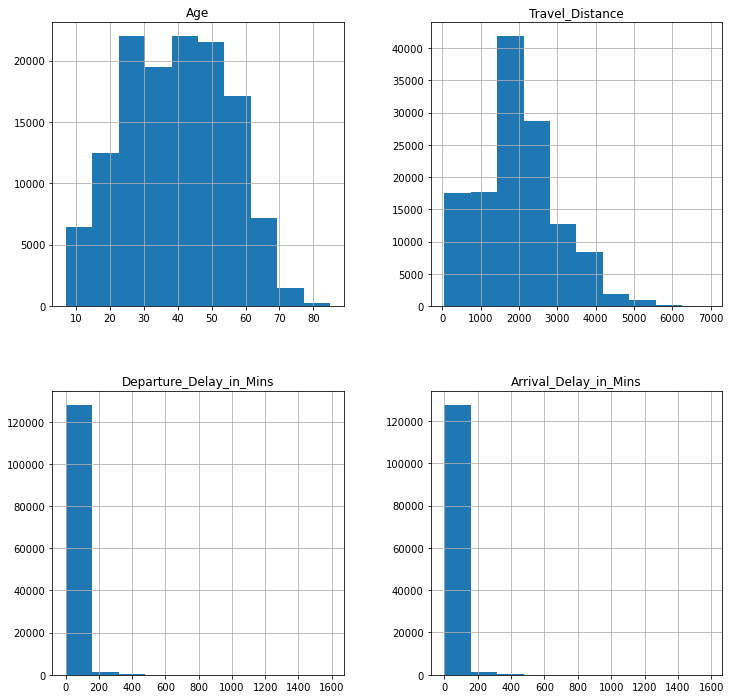

In [22]:
# Numerical Features: Histograms
df[num_cols].hist(figsize=(12,12))
plt.show();

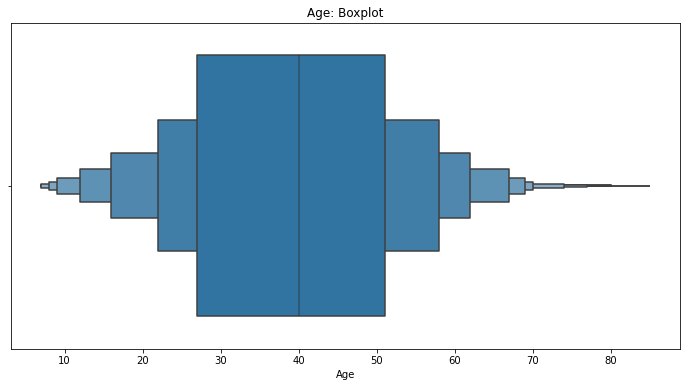

In [23]:
# Age: Boxplot
plt.figure(figsize=(12,6))
sns.boxenplot(df['Age'])
plt.title('Age: Boxplot');

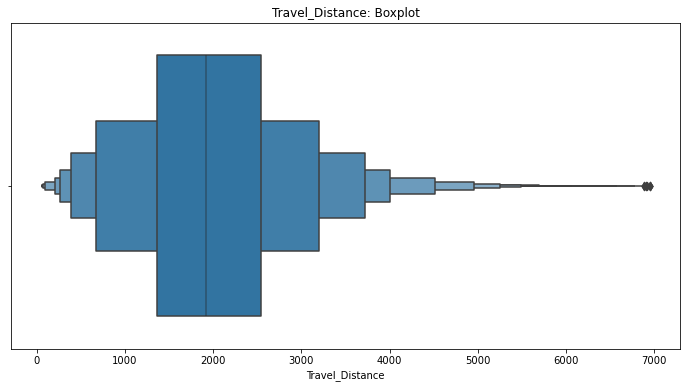

In [24]:
# Travel_Distance: Boxplot
plt.figure(figsize=(12,6))
sns.boxenplot(df['Travel_Distance'])
plt.title('Travel_Distance: Boxplot');

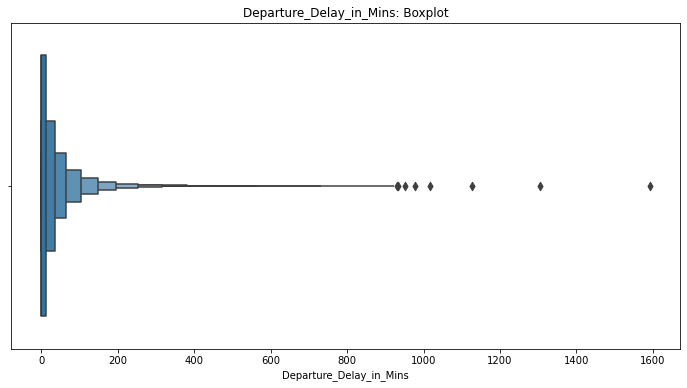

In [25]:
# Departure_Delay_in_Mins: Boxplot
plt.figure(figsize=(12,6))
sns.boxenplot(df['Departure_Delay_in_Mins'])
plt.title('Departure_Delay_in_Mins: Boxplot');

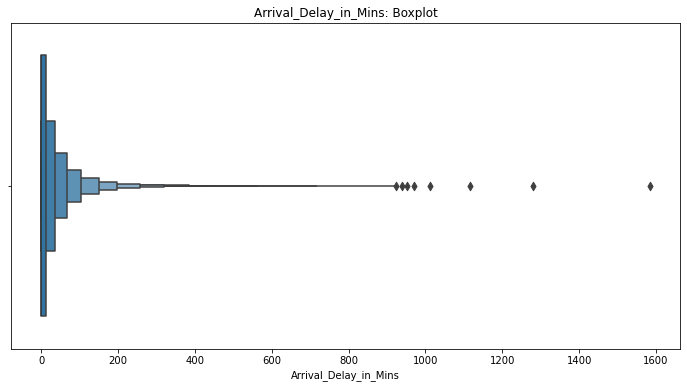

In [26]:
# Arrival_Delay_in_Mins: Boxplot
plt.figure(figsize=(12,6))
sns.boxenplot(df['Arrival_Delay_in_Mins'])
plt.title('Arrival_Delay_in_Mins: Boxplot');

**Observations:**
 - Age Almost Follows A Normal Distribution. All Other Numerical Columns Have Right Skewed Distributions.
 - Ouliers Are Present On All Numerical Columns:
  - Age q75: 51
  - Travel Distance q75: 2543
  - Departure Delay q75: 12
  - Arrival Delay q75: 13 
  - There is Missing Data: Less than 4%
 - **2. Test for Normalization?**
 - **3. Clip Outliers?**

#### E. DATASET: BIVARIATE & MULTIVARIATE ANALYSIS

In [27]:
# Reselect Train
df_train = df[df['Source'] == 'train']

Target Variable: Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’

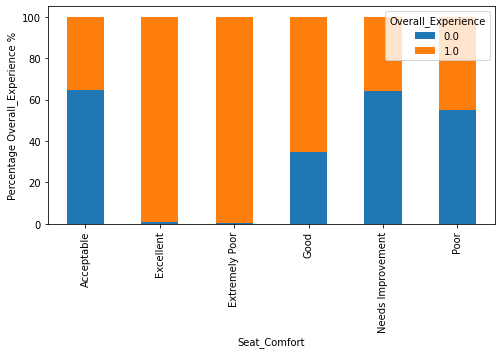

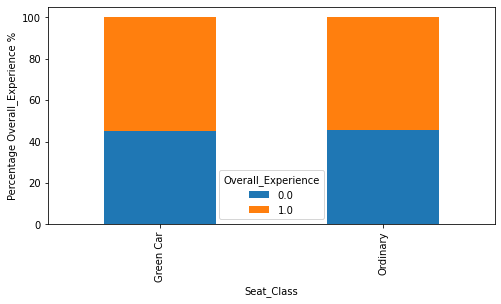

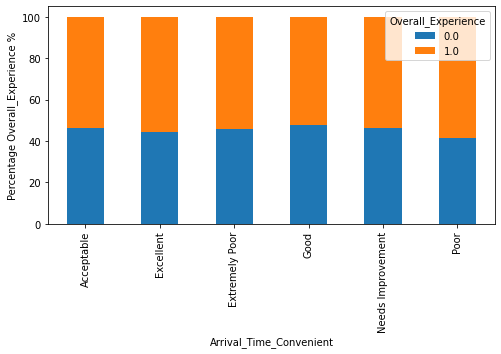

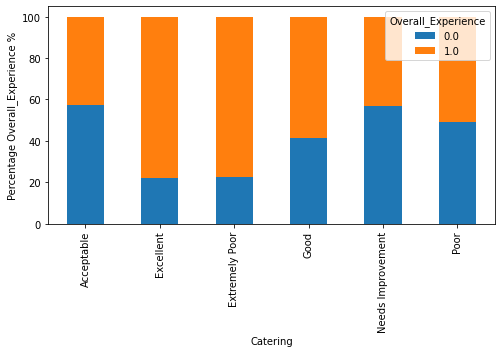

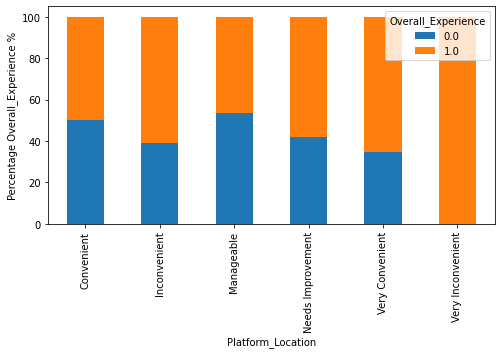

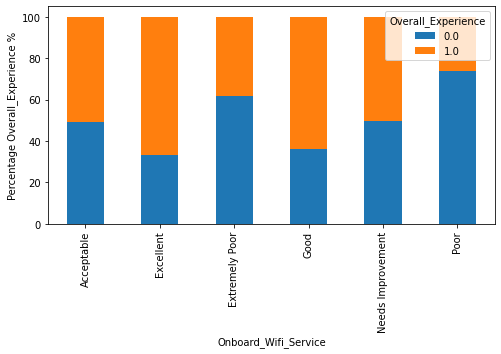

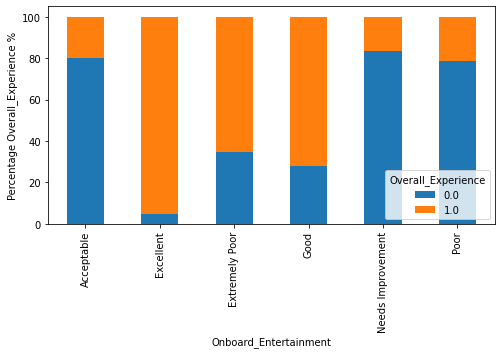

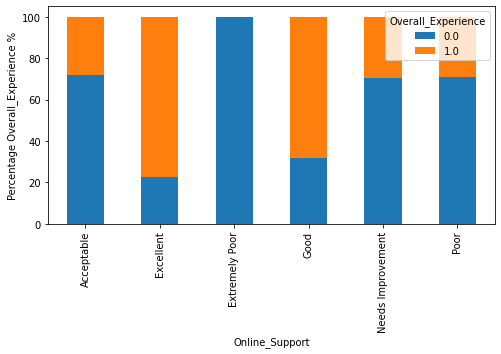

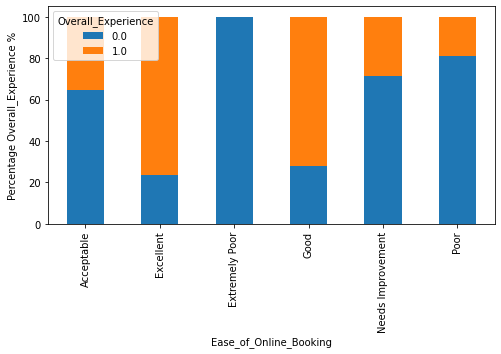

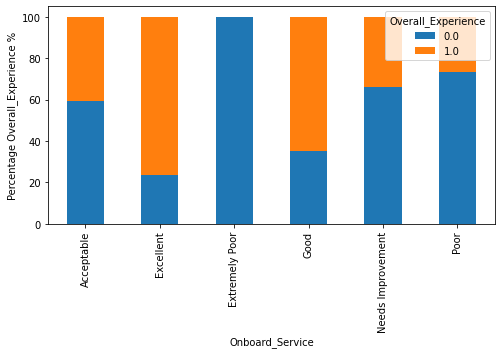

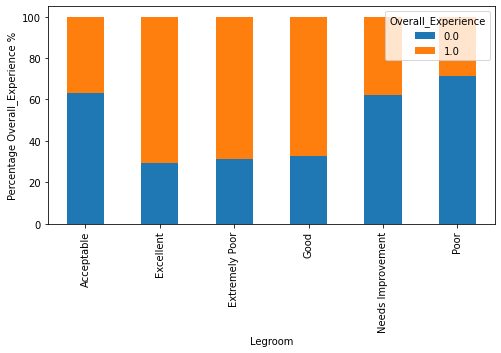

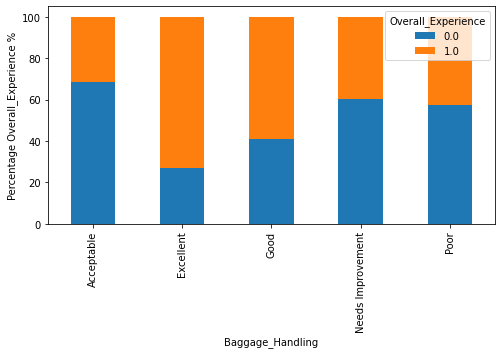

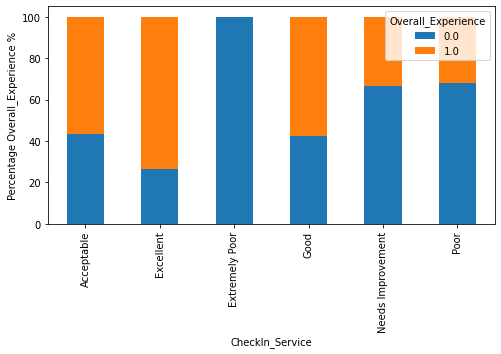

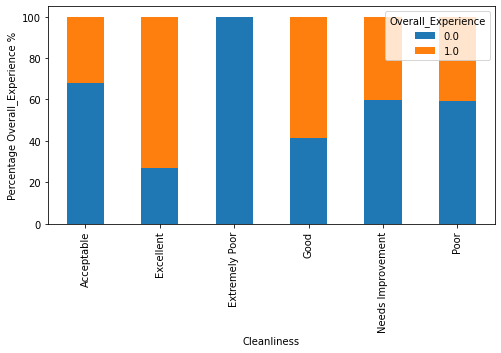

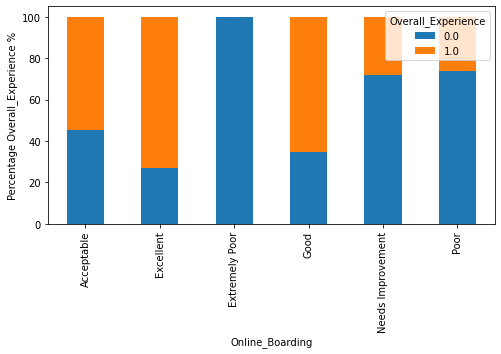

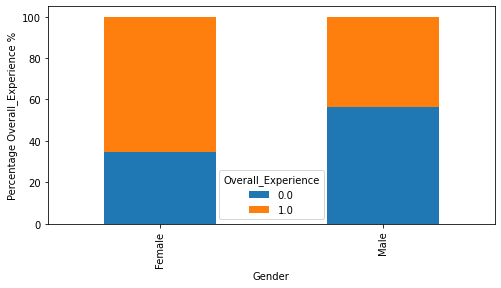

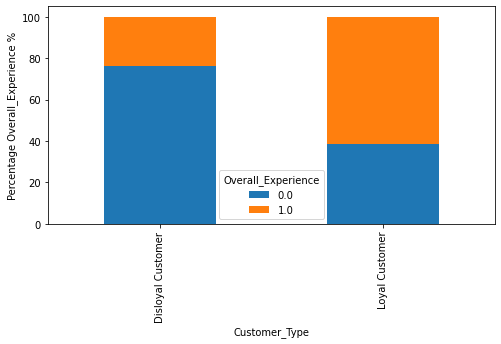

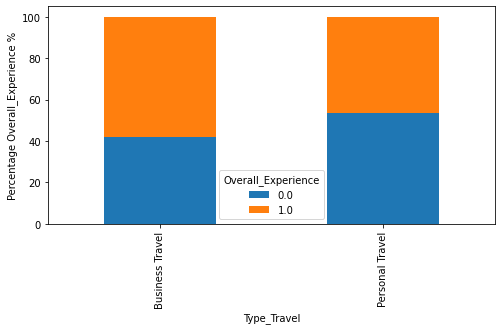

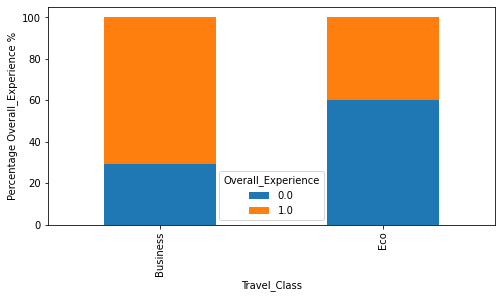

In [28]:
for i in cat_cols:
    if i!='Overall_Experience':
        (pd.crosstab(df_train[i],df_train['Overall_Experience'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Overall_Experience %')

In [29]:
# Create An Experience Conversion Function
def experience_convert(x):
    if x==0.0:
        return 'Not_Satisfied'
    elif x==1.0:
        return 'Satistfied'
    else: 
        return 'Unknown'

In [30]:
# Create A Categorical Column from Overall Experience
df['Overall_Experience_Modified'] = df['Overall_Experience'].apply(experience_convert)

In [31]:
# Reselect Train
df_train = df[df['Source'] == 'train']

In [32]:
# Create Second Dataset from Train
df_two = df_train[['Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding',
       'Gender', 'Customer_Type','Type_Travel', 'Travel_Class','Overall_Experience_Modified']]

In [33]:
# Convert Second Dataset into Dummies
df_two = pd.get_dummies(df_two)


In [34]:
# Second Dataset Correlation
df_overall_experience_corr = df_two.corr()['Overall_Experience_Modified_Not_Satisfied'].sort_values(ascending=True)[1:-1]
df_overall_experience_corr = pd.DataFrame(df_overall_experience_corr.reset_index())
df_overall_experience_corr = df_overall_experience_corr.rename(columns={'index':'Features','Overall_Experience_Modified_Not_Satisfied':'Not Satisfied Corr'})

In [35]:
# Categorical Columns: Positive Correlations
df_overall_experience_corr.sort_values(by='Not Satisfied Corr',ascending=False).head(10)

,Features,Not Satisfied Corr
92,Onboard_Entertainment_Acceptable,0.334410
91,Onboard_Entertainment_Needs Improvement,0.316613
90,Travel_Class_Eco,0.310013
89,Customer_Type_Disloyal Customer,0.274699
88,Ease_of_Online_Booking_Poor,0.241885
87,Online_Support_Acceptable,0.238986
86,Baggage_Handling_Acceptable,0.225980
85,Ease_of_Online_Booking_Needs Improvement,0.223424
84,Online_Boarding_Needs Improvement,0.217726
83,Cleanliness_Acceptable,0.216492


In [36]:
# Categorical Columns: Negative Correlations
df_overall_experience_corr.sort_values(by='Not Satisfied Corr',ascending=True).head(10)

,Features,Not Satisfied Corr
0,Onboard_Entertainment_Excellent,-0.445025
1,Seat_Comfort_Excellent,-0.357569
2,Travel_Class_Business,-0.310013
3,Online_Support_Excellent,-0.279619
4,Ease_of_Online_Booking_Excellent,-0.260426
5,Onboard_Entertainment_Good,-0.239238
6,Customer_Type_Loyal Customer,-0.235756
7,Onboard_Service_Excellent,-0.234902
8,Baggage_Handling_Excellent,-0.230539
9,Ease_of_Online_Booking_Good,-0.230436


**Observations:**
 - **Categorical Features with Positive Correlation to Not Satisfied**: Onboard_Entertainment_Acceptable, Onboard_Entertainment_Needs Improvement, Travel_Class_Eco, Customer_Type_Disloyal Customer, Ease_of_Online_Booking_Poor, Online_Support_Acceptable, Baggage_Handling_Acceptable, Ease_of_Online_Booking_Needs Improvement, Online_Boarding_Needs Improvement & Cleanliness_Acceptable.
 - **Categorical Features with Negative Correlation to Not Satisfied**: Onboard_Entertainment_Excellent, Seat_Comfort_Excellent, Travel_Class_Business, Online_Support_Excellent, Ease_of_Online_Booking_Excellent, Onboard_Entertainment_Good, Customer_Type_Loyal Customer, Onboard_Service_Excellent, Baggage_Handling_Excellent, Ease_of_Online_Booking_Good.

In [37]:
# Numerical Columns: Group by Experience
df_train.groupby(['Overall_Experience'])[num_cols].mean()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
Overall_Experience,,,,
0.0,37.49018,2025.826088,17.738600,18.392374
1.0,41.01968,1939.962650,12.083107,12.196763


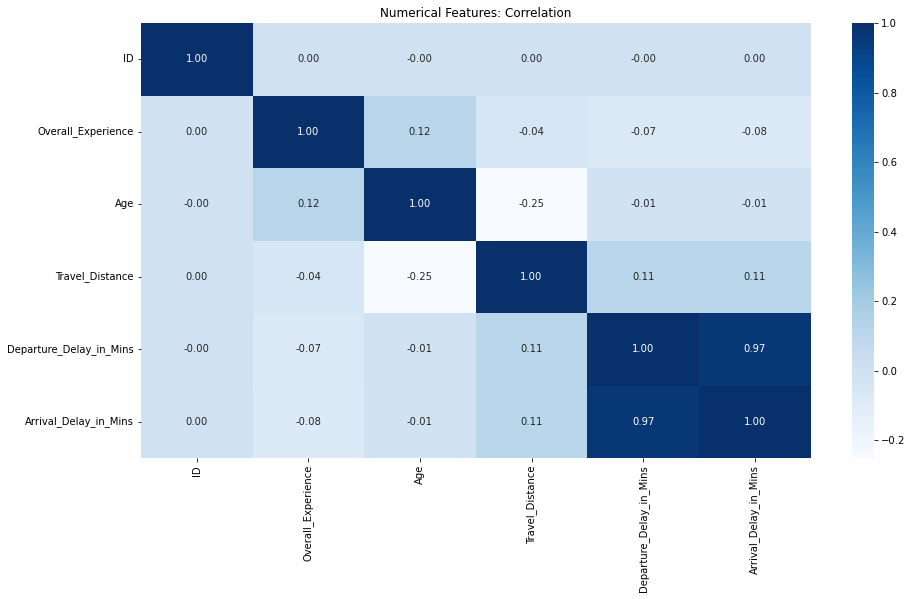

In [38]:
# Correlation: Numerical Values
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(),annot=True, fmt='0.2f', cmap='Blues')
plt.title('Numerical Features: Correlation');

**Observations:**
 - Small Positive Correlation Between Age and Overall Experience.
 - Slight Negative Correlation Between Arrival Delay, Departure Delay and Travel Distintance.

#### F. DATASET: PREPARATION

In [39]:
# Overall_Experience_Modified Drop 
df.drop(columns='Overall_Experience_Modified',axis=1, inplace=True)

In [40]:
# Create A Prepared Dataset
df_prep = df.copy()

In [41]:
# Categorical Features: Fill NA with Unknown
df_prep[['Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding',
       'Gender', 'Customer_Type','Type_Travel', 'Travel_Class']] = df[['Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding',
       'Gender', 'Customer_Type','Type_Travel', 'Travel_Class']].fillna(value='Unknown')

In [42]:
# Create Type Travel Conversion Function
def type_travel_convert(x):
    if x=="Business Travel":
        return 1
    elif x=="Personal Travel":
        return 0
    else: 
        return -1

In [43]:
# Apply Type_Travel Conversion Function
df_prep['Type_Travel_Modified'] = df_prep['Type_Travel'].apply(type_travel_convert)

In [44]:
# Type Travel: Group By Travel_Class
df_prep[df_prep['Type_Travel']!='Unknown'].groupby(by='Travel_Class').median()['Type_Travel_Modified']

Travel_Class
Business    1.0
Eco         0.0
Name: Type_Travel_Modified, dtype: float64

In [45]:
# Recreate 'Type_Travel_Modified
df_prep['Type_Travel_Modified'] = df_prep['Type_Travel']

In [46]:
# Type Travel: Fill NA
df_prep['Type_Travel_Modified'][(df_prep['Type_Travel_Modified']=='Unknown') & (df_prep['Travel_Class']=='Business')]="Business Travel"
df_prep['Type_Travel_Modified'][(df_prep['Type_Travel_Modified']=='Unknown') & (df_prep['Travel_Class']=='Eco')]="Personal Travel"

In [47]:
# Age: Group By Customer_Type & Travel_Class
df_prep.groupby(by=['Travel_Class','Customer_Type']).median()['Age']

Travel_Class  Customer_Type    
Business      Disloyal Customer    30.0
              Loyal Customer       44.0
              Unknown              42.0
Eco           Disloyal Customer    25.0
              Loyal Customer       40.0
              Unknown              37.0
Name: Age, dtype: float64

In [48]:
# Age: Fill NA - New Column
df_prep['Age_Modified'] = df_prep.groupby(by=['Travel_Class','Customer_Type'])['Age'].transform(lambda value:value.fillna(value.median()))

In [49]:
# Departure_Delay_in_Mins
df_prep['Departure_Delay_in_Mins'].mean()

14.711066630740213

In [50]:
# Departure_Delay_in_Mins_Modified: Fill NA - New Column
df_prep['Departure_Delay_in_Mins_Modified'] = df_prep['Departure_Delay_in_Mins'].fillna(14.7)

In [51]:
# Arrival_Delay_in_Mins
df_prep['Arrival_Delay_in_Mins'].mean()

15.088393139821314

In [52]:
# Arrival_Delay_in_Mins_Modified: Fill NA - New Column
df_prep['Arrival_Delay_in_Mins_Modified'] = df_prep['Arrival_Delay_in_Mins'].fillna(15.1)

In [53]:
# Drop Unwanted Columns
df_prep.drop(columns=["Age","Departure_Delay_in_Mins","Arrival_Delay_in_Mins","Type_Travel"],inplace=True)

In [54]:
# Prep. Dataset: Missing Values: All
print('All Dataset: Missing Values %')
print("-----")
df_prep.isnull().sum().sort_values(ascending=False)/df_prep.shape[0]*100

All Dataset: Missing Values %
-----


Overall_Experience                  27.390157
ID                                   0.000000
Departure_Delay_in_Mins_Modified     0.000000
Age_Modified                         0.000000
Type_Travel_Modified                 0.000000
Source                               0.000000
Travel_Distance                      0.000000
Travel_Class                         0.000000
Customer_Type                        0.000000
Gender                               0.000000
Online_Boarding                      0.000000
Cleanliness                          0.000000
CheckIn_Service                      0.000000
Baggage_Handling                     0.000000
Legroom                              0.000000
Onboard_Service                      0.000000
Ease_of_Online_Booking               0.000000
Online_Support                       0.000000
Onboard_Entertainment                0.000000
Onboard_Wifi_Service                 0.000000
Platform_Location                    0.000000
Catering                          

#### G. DATASET: PCA

In [55]:
# Saved Prepared Data
df_pca = df_prep.copy()

In [56]:
# Drop Unwanted Columns
df_pca.drop(columns=["ID","Source","Overall_Experience"],inplace=True)

In [57]:
# Create Dummies for PCA
df_pca_two = pd.get_dummies(df_pca, drop_first=True)

In [58]:
# PCA Dataset Shape
df_pca_two.shape

(129981, 94)

In [59]:
# Load Scaler
scaler = StandardScaler()

In [60]:
# Dataset Scaled
data_scaled = scaler.fit_transform(df_pca_two)

In [61]:
data_scaled = pd.DataFrame(data_scaled, columns=df_pca_two.columns)

In [62]:
# Defining Number of Principal Components to Generate 
n = data_scaled.shape[1]

# Finding Principal Components for the Data
pca1 = PCA(n_components=n, random_state=1)
data_pca = pd.DataFrame(pca1.fit_transform(data_scaled))

# The percentage of Variance explained by Each Principal Component
exp_var1 = pca1.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

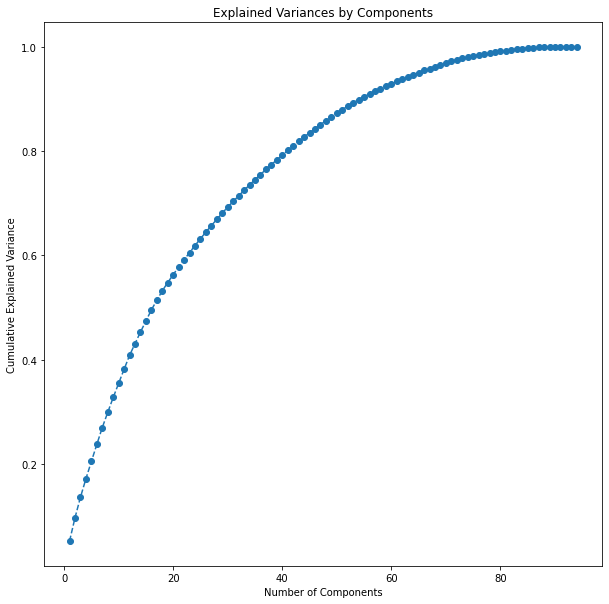

In [63]:
# Visulaize the Explained Variance by Individual Components
plt.figure(figsize = (10,10))
plt.plot(range(1,95), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [64]:
# Find the Least Number of Components that Can Explain More than 85% Variance
sum = 0
for ix, i in enumerate(exp_var1):
  sum = sum + i
  if(sum>0.85):
    print("Number of PCs that explain at least 85% variance: ", ix+1)
    break

Number of PCs that explain at least 85% variance:  47


In [65]:
# Load Final PCA
pca_final = PCA(n_components=47).fit(data_scaled)

In [66]:
# PCA Fit/Transfrom X
X_pca_final = pca_final.transform(data_scaled)

In [67]:
# Number of Components
n_pcs= pca_final.components_.shape[0]

In [68]:
# Most Important Features: PCA
most_important = [np.abs(pca_final.components_[i]).argmax() for i in range(n_pcs)]

In [69]:
# Original Features Names
initial_feature_names = ['Travel_Distance', 'Age_Modified', 'Departure_Delay_in_Mins_Modified','Arrival_Delay_in_Mins_Modified', 'Seat_Comfort_Excellent','Seat_Comfort_Extremely Poor', 'Seat_Comfort_Good','Seat_Comfort_Needs Improvement', 'Seat_Comfort_Poor','Seat_Comfort_Unknown', 'Seat_Class_Ordinary','Arrival_Time_Convenient_Excellent','Arrival_Time_Convenient_Extremely Poor','Arrival_Time_Convenient_Good','Arrival_Time_Convenient_Needs Improvement','Arrival_Time_Convenient_Poor', 'Arrival_Time_Convenient_Unknown','Catering_Excellent', 'Catering_Extremely Poor', 'Catering_Good','Catering_Needs Improvement', 'Catering_Poor', 'Catering_Unknown','Platform_Location_Inconvenient', 'Platform_Location_Manageable','Platform_Location_Needs Improvement', 'Platform_Location_Unknown','Platform_Location_Very Convenient','Platform_Location_Very Inconvenient', 'Onboard_Wifi_Service_Excellent','Onboard_Wifi_Service_Extremely Poor', 'Onboard_Wifi_Service_Good','Onboard_Wifi_Service_Needs Improvement', 'Onboard_Wifi_Service_Poor','Onboard_Wifi_Service_Unknown', 'Onboard_Entertainment_Excellent','Onboard_Entertainment_Extremely Poor', 'Onboard_Entertainment_Good','Onboard_Entertainment_Needs Improvement', 'Onboard_Entertainment_Poor','Onboard_Entertainment_Unknown', 'Online_Support_Excellent','Online_Support_Extremely Poor', 'Online_Support_Good','Online_Support_Needs Improvement', 'Online_Support_Poor','Online_Support_Unknown', 'Ease_of_Online_Booking_Excellent','Ease_of_Online_Booking_Extremely Poor', 'Ease_of_Online_Booking_Good','Ease_of_Online_Booking_Needs Improvement','Ease_of_Online_Booking_Poor', 'Ease_of_Online_Booking_Unknown','Onboard_Service_Excellent', 'Onboard_Service_Extremely Poor','Onboard_Service_Good', 'Onboard_Service_Needs Improvement','Onboard_Service_Poor', 'Onboard_Service_Unknown', 'Legroom_Excellent','Legroom_Extremely Poor', 'Legroom_Good', 'Legroom_Needs Improvement','Legroom_Poor', 'Legroom_Unknown', 'Baggage_Handling_Excellent','Baggage_Handling_Good', 'Baggage_Handling_Needs Improvement','Baggage_Handling_Poor', 'Baggage_Handling_Unknown','CheckIn_Service_Excellent', 'CheckIn_Service_Extremely Poor','CheckIn_Service_Good', 'CheckIn_Service_Needs Improvement','CheckIn_Service_Poor', 'CheckIn_Service_Unknown','Cleanliness_Excellent', 'Cleanliness_Extremely Poor','Cleanliness_Good', 'Cleanliness_Needs Improvement', 'Cleanliness_Poor','Cleanliness_Unknown', 'Online_Boarding_Excellent','Online_Boarding_Extremely Poor', 'Online_Boarding_Good','Online_Boarding_Needs Improvement', 'Online_Boarding_Poor','Online_Boarding_Unknown', 'Gender_Male', 'Gender_Unknown','Customer_Type_Loyal Customer', 'Customer_Type_Unknown','Travel_Class_Eco', 'Type_Travel_Modified_Personal Travel']

In [70]:
# Apply Features Names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [71]:
# PCA Dictionary
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

In [72]:
# PCA: Most Important Features
pca_most_important_columns = pd.DataFrame(dic.items())

In [73]:
pca_most_important_columns[1]

0           Ease_of_Online_Booking_Excellent
1                Ease_of_Online_Booking_Good
2                Ease_of_Online_Booking_Poor
3                     Online_Support_Unknown
4                              Catering_Poor
5                 Catering_Needs Improvement
6                         Catering_Excellent
7                    Catering_Extremely Poor
8                    Catering_Extremely Poor
9               Onboard_Wifi_Service_Unknown
10     Ease_of_Online_Booking_Extremely Poor
11     Ease_of_Online_Booking_Extremely Poor
12             Online_Support_Extremely Poor
13             Online_Support_Extremely Poor
14          Departure_Delay_in_Mins_Modified
15                       Cleanliness_Unknown
16      Type_Travel_Modified_Personal Travel
17                          Travel_Class_Eco
18            Online_Boarding_Extremely Poor
19              Platform_Location_Manageable
20                           Travel_Distance
21                      CheckIn_Service_Good
22        

In [74]:
# Explained Variance by Component (PC1 explains x% of the data)
pca_final.explained_variance_ratio_

array([0.05207911, 0.04490016, 0.03930393, 0.03541751, 0.03313271,
       0.03274179, 0.03236937, 0.0290993 , 0.02852179, 0.02722953,
       0.02696605, 0.02657911, 0.02248841, 0.02229517, 0.02118759,
       0.02118273, 0.01864038, 0.01800724, 0.01589647, 0.01524448,
       0.01435971, 0.01418681, 0.01364054, 0.0135834 , 0.01302287,
       0.01283486, 0.01232781, 0.01206141, 0.01195015, 0.0116798 ,
       0.01069401, 0.01065656, 0.01056581, 0.01047944, 0.01001458,
       0.00976548, 0.00970492, 0.00926542, 0.00916591, 0.00900384,
       0.00897196, 0.00856415, 0.00855953, 0.00835602, 0.00824173,
       0.00793443, 0.00776895])

In [75]:
# Total Explained Variance
np.sum((pca_final.explained_variance_ratio_))

0.8506429420392676

In [76]:
# PCA Essential Columns
df_pca_essential_cols = df_pca_two[["Arrival_Time_Convenient_Extremely Poor", "Arrival_Time_Convenient_Unknown", "Baggage_Handling_Unknown", "Catering_Excellent", "Catering_Extremely Poor", "Catering_Needs Improvement", "Catering_Poor", "Catering_Unknown", "CheckIn_Service_Good", "CheckIn_Service_Needs Improvement", "CheckIn_Service_Poor", "Cleanliness_Unknown", "Departure_Delay_in_Mins_Modified", "Ease_of_Online_Booking_Excellent", "Ease_of_Online_Booking_Extremely Poor", "Ease_of_Online_Booking_Good", "Ease_of_Online_Booking_Poor", "Gender_Male", "Gender_Unknown", "Legroom_Good", "Legroom_Needs Improvement", "Legroom_Unknown", "Onboard_Entertainment_Excellent", "Onboard_Entertainment_Poor", "Onboard_Service_Good", "Onboard_Service_Poor", "Onboard_Wifi_Service_Extremely Poor", "Online_Boarding_Extremely Poor", "Online_Support_Extremely Poor", "Online_Support_Good", "Online_Support_Unknown", "Platform_Location_Manageable", "Platform_Location_Unknown", "Platform_Location_Very Inconvenient", "Seat_Class_Ordinary", "Seat_Comfort_Unknown", "Travel_Class_Eco", "Travel_Distance", "Type_Travel_Modified_Personal Travel"]]

In [77]:
# PCA: Essential Features
df_pca_essential_cols.shape[1]

39

In [78]:
df_pca_essential_cols['Overall_Experience'] = df_prep['Overall_Experience']

In [79]:
df_pca_essential_cols.corr()['Overall_Experience'].sort_values(ascending=False)

Overall_Experience                        1.000000
Onboard_Entertainment_Excellent           0.445025
Ease_of_Online_Booking_Excellent          0.260426
Ease_of_Online_Booking_Good               0.230436
Catering_Excellent                        0.192048
Online_Support_Good                       0.183974
Legroom_Good                              0.166287
Onboard_Service_Good                      0.128451
Catering_Extremely Poor                   0.095437
CheckIn_Service_Good                      0.035591
Cleanliness_Unknown                       0.007261
Online_Support_Unknown                    0.007032
Platform_Location_Very Inconvenient       0.004192
Arrival_Time_Convenient_Unknown           0.004098
Legroom_Unknown                           0.003310
Catering_Unknown                          0.001150
Platform_Location_Unknown                 0.000717
Baggage_Handling_Unknown                  0.000206
Seat_Comfort_Unknown                     -0.001127
Arrival_Time_Convenient_Extreme

**Observations:**
 - **PCA Analysis:** 85% of Data can Be Explained by 39 Features
 - **TOP PCA:** Ease_of_Online_Booking_Excellent, Ease_of_Online_Booking_Good, Ease_of_Online_Booking_Poor, **Online_Support_Unknown**, Catering_Poor.
 - **Top PCA with Positive Correlations:** Onboard_Entertainment_Excellent, Ease_of_Online_Booking_Excellent, Ease_of_Online_Booking_Good.
 - **Top PCA with Negative Correlations:** Onboard_Entertainment_Poor, Gender_Male, Ease_of_Online_Booking_Poor, Travel_Class_Eco.

#### G. PROCESSED DATASET: EXPORT

In [80]:
# Final Dataset
df_final = df_prep.copy()

In [81]:
# Save CSV File
df_final.to_csv('./data/processed_data/df_processed.csv')